# Исследование перспективного тарифа для телеком компании

### Источник данных
Данные оператора мобильной связи: использование тарифов на выборке клиентов, описания тарифов мобильной связи.

### Основные цели проекта
1. Проведение предварительного анализа использования тарифов на выборке клиентов:

- проанализировать поведение клиентов при использовании услуг оператора,
- определить оптимальные наборы услуг для пользователей.

2. Проверка гипотез:

- о различии выручки абонентов разных тарифов,
- о различии выручки абонентов из Москвы и других регионов.

3. Определение выгодного тарифного плана для корректировки рекламного бюджета.

## 1. Изучение данных.

In [1]:
import pandas as pd
import numpy as np
import math as m

In [2]:
#Загружаем данные.
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

#### <font color='purple'>Изучаем последовательно данные во всех таблицах.

Посмотрим на каждую таблицу последовательно, примем решение: где требуется замена данных, заполнение пропусков.

#### <font color='purple'>Изучим таблицу data_calls:
- общую информацию,
- посмотрим на данные,
- посчитаем пропуски,
- посмотрим на уникальные значения.

In [3]:
#Смотрим общую информацию.
print(data_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [4]:
#Смотрим на данные.
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
#Определяю количество пропущенных значений в столбцах таблицы.
print(data_calls.isnull().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64


In [6]:
#Вывожу списки уникальных значений для каждого столбца, чтобы найти пропуски и аномальные значения.
for column in list(data_calls):
    print('Столбец', column, ':', data_calls[column].unique())

Столбец id : ['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
Столбец call_date : ['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '20

**Вывод:**
- Необходимо заменить тип данных у столбца 'call_date' с object на datetime.
- Необходимо принять решение о строках в таблице с duration = 0.0.
- Необходимо округлить данные в столбце 'duration' в большую сторону до целого, изменить тип данных на int.

#### <font color='purple'>Изучим таблицу data_internet:
- общую информацию,
- посмотрим на данные,
- посчитаем пропуски,
- посмотрим на уникальные значения.

In [7]:
#Смотрим общую информацию.
print(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [8]:
#Смотрим на данные.
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [9]:
#Определяю количество пропущенных значений в столбцах таблицы.
print(data_internet.isnull().sum())

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


In [10]:
#Вывожу списки уникальных значений для каждого столбца, чтобы найти пропуски и аномальные значения.
for column in list(data_internet):
    print('Столбец', column, ':', data_internet[column].unique())

Столбец Unnamed: 0 : [     0      1      2 ... 149393 149394 149395]
Столбец id : ['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
Столбец mb_used : [ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
Столбец session_date : ['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-11-04' '2018-06-16' '2018-12-07'
 '2018-08-25' '2018-06-15' '201

**Вывод:**
- Необходимо заменить тип данных у столбца 'session_date' с object на datetime.
- Необходимо принять решение о строках в таблице с mb_used = 0.0.
- Необходимо округлить данные в столбце 'mb_used' в большую сторону до целого, изменить тип данных на int.
- Удалить столбец 'Unnamed: 0', т.к. он не несет полезной информации.

#### <font color='purple'>Изучим таблицу data_messages:
- общую информацию,
- посмотрим на данные,
- посчитаем пропуски,
- посмотрим на уникальные значения.

In [11]:
#Смотрим общую информацию.
print(data_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [12]:
#Смотрим на данные.
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [13]:
#Определяю количество пропущенных значений в столбцах таблицы.
print(data_messages.isnull().sum())

id              0
message_date    0
user_id         0
dtype: int64


In [14]:
#Вывожу списки уникальных значений для каждого столбца, чтобы найти пропуски и аномальные значения.
for column in list(data_messages):
    print('Столбец', column, ':', data_messages[column].unique())

Столбец id : ['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
Столбец message_date : ['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-08-13' '2018-12-31' 

**Вывод:**
- Необходимо заменить тип данных у столбца 'message_date' с object на datetime.

#### <font color='purple'>Изучим таблицу data_tariffs:
- общую информацию,
- посмотрим на данные,
- посчитаем пропуски,
- посмотрим на уникальные значения.

In [15]:
#Смотрим общую информацию.
print(data_tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [16]:
#Смотрим на данные.
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
#Определяю количество пропущенных значений в столбцах таблицы.
print(data_tariffs.isnull().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


In [18]:
#Вывожу списки уникальных значений для каждого столбца, чтобы найти пропуски и аномальные значения.
for column in list(data_tariffs):
    print('Столбец', column, ':', data_tariffs[column].unique())

Столбец messages_included : [  50 1000]
Столбец mb_per_month_included : [15360 30720]
Столбец minutes_included : [ 500 3000]
Столбец rub_monthly_fee : [ 550 1950]
Столбец rub_per_gb : [200 150]
Столбец rub_per_message : [3 1]
Столбец rub_per_minute : [3 1]
Столбец tariff_name : ['smart' 'ultra']


**Вывод:**
Правки не требуются.

#### <font color='purple'>Изучим таблицу data_users:
- общую информацию,
- посмотрим на данные,
- посчитаем пропуски,
- посмотрим на уникальные значения.

In [19]:
#Смотрим общую информацию.
print(data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [20]:
#Смотрим на данные.
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [21]:
#Определяю количество пропущенных значений в столбцах таблицы.
print(data_users.isnull().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


In [22]:
#Вывожу списки уникальных значений для каждого столбца, чтобы найти пропуски и аномальные значения.
for column in list(data_users):
    print('Столбец', column, ':', data_users[column].unique())

Столбец user_id : [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 119

**Вывод:**
- Необходимо заменить тип данных у столбца 'reg_date' с object на datetime.
- Обработать пропуски в столбце 'churn_date'.

## Общий вывод

Определены столбцы для предообработки в каждой таблице:
- заменить тип данных в столбцах с датами с object на datetime: data_calls['call_date'], data_internet['session_date'], data_messages['message_date'], data_users['reg_date'];
- обработать пропуски в столбце data_users['churn_date'];
- обработать звонки/сообщения/мегабайты вне тарифа, т.е. те данные, которые были до даты регистрации, либо после отключения;
- удалить столбец 'Unnamed: 0' в таблице data_internet;
- округлить данные в data_internet['mb_used'] и data_calls['duration'] в большую сторону до целого, изменить тип данных на int, принять решение о строках со значениями 0.

## 2. Предобработка данных

<font color='purple'>Заменяем тип данных у столбцов с датами в разных таблицах для возможности работы с датами.

In [23]:
#Заменю тип данных в таблицах столбцам с датами: с object на datetime. 
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

<font color='purple'>Округляем значения в data_internet['mb_used'] и data_calls['duration'].

Делаем это из-за условий тарифов: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [24]:
#Напишем функцию для окргуления столбцов.
def round_data(used):
    return m.ceil(used)

#Округляем данные в столбцах и меняем тип данных на int.
data_internet['mb_used'] = data_internet['mb_used'].apply(round_data)
data_calls['duration'] = data_calls['duration'].apply(round_data)

<font color='purple'>Удалим столбец 'Unnamed: 0' в таблице data_internet.

In [25]:
data_internet = data_internet.drop(['Unnamed: 0'], axis=1)

<font color='purple'>Обработаем пропуски в столбце 'churn_date' таблицы data_users.

Данные представлены за 2018 год. Если значение пропущено в этом столбце пропущено, значит тариф ещё действовал на момент выгрузки данных. Поэтому заполню пропуски последней датой 2018 года для дальнейших расчетов.

In [26]:
data_users['churn_date'] = data_users['churn_date'].fillna('2018-12-31')

#Заменим тип данных с object на datetime.
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

<font color='purple'>Обработаем звонки/сообщения/мегабайты вне тарифа.

Удаляем строки из таблиц, которые соответствуют звонкам/сообщениям/мегабайтам вне тарифа. Делаем это, т.к. их исследование нам неинтересно в рамках текущей задачи. 

In [27]:
%%time
for line in range(500):
    data_calls.drop(data_calls[((data_calls['call_date'] < data_users.loc[line, 'reg_date']) | (data_calls['call_date'] > data_users.loc[line, 'churn_date'])) & (data_calls['user_id'] == data_users.loc[line, 'user_id'])].index, inplace = True)
    data_messages.drop(data_messages[((data_messages['message_date'] < data_users.loc[line, 'reg_date']) | (data_messages['message_date'] > data_users.loc[line, 'churn_date'])) & (data_messages['user_id'] == data_users.loc[line, 'user_id'])].index, inplace = True)
    data_internet.drop(data_internet[((data_internet['session_date'] < data_users.loc[line, 'reg_date']) | (data_internet['session_date'] > data_users.loc[line, 'churn_date'])) & (data_internet['user_id'] == data_users.loc[line, 'user_id'])].index, inplace = True)    

CPU times: user 52.3 s, sys: 7.15 s, total: 59.5 s
Wall time: 59.9 s


In [28]:
#Проверим информацию после отработки удаления.
print(data_internet.info())
print(data_calls.info())
print(data_messages.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ MB
None


Размерности не изменились, значит таких строк не было найдено.

<font color='purple'>Что делать с 0 значениями в длительности звонков и использовании интернета?

Что это могут быть за случаи?
Звонки с 0 длительностью могут быть пропущеенными звонками, а использование интернета с 0 МБ - нетарифицируемые сеансы использования. Например, есть тарифы у операторов, которые не берут деньги за использрование мессенджеров/определеннх сервисов.

In [29]:
#Посмотрю на количество таких данных.
print(data_internet.query('mb_used == 0.00')['mb_used'].count())
print(data_calls.query('duration == 0.00')['duration'].count())

19598
39613


Таких данных много. Пока не буду их заполнять/удалять, посмотрю далее при анализе.

## Общий вывод

Данные предобработаны, можно начинать анализ.

## 3. Подсчет нужных данных

Необходимо посчитать для анализа для каждого пользователя: 
- количество сделанных звонков и израсходованных минут разговора по месяцам,
- количество отправленных сообщений по месяцам, 
- объем израсходованного интернет-трафика по месяцам,
- помесячную выручку с каждого пользователя.

Для удобства будем составлять таблицу data с искомыми сущностями и нужными столбцами из других таблиц.

In [30]:
#Задаем таблицу, добавляем в нее 4 столбца: 'user_id','tariff', 'reg_date', 'churn_date'.
data = pd.DataFrame()
data['user_id'] = data_users['user_id']
data['tariff'] = data_users['tariff']
data['reg_date'] = data_users['reg_date']
data['churn_date'] = data_users['churn_date']

Все данные необходимо счиатать по месяцам, поэтому необходимо сделать подготовку. Месяцы будем считать по промежуткам длинной в месяц, начинать будем отсчет от даты регистрации на тарифе. Для этого воспользуемся библиотекой dateutil.relativedelta.
Для подсчетов напишем функции.

In [31]:
from dateutil.relativedelta import relativedelta

In [32]:
#Напишем функцию расчета месяцев для таблицы звонков.
def month_delta_calls(row):
    row['months'] = relativedelta(row['call_date'], (data_users.loc[data_users['user_id'] == row['user_id'], 'reg_date']).tolist()[0]).months
    return row

In [33]:
%%time
#Применем функцию к таблице звонков.
data_calls = data_calls.apply(month_delta_calls, axis=1)

CPU times: user 7min 29s, sys: 3.64 s, total: 7min 33s
Wall time: 7min 47s


In [35]:
#Напишем функцию расчета месяцев для таблицы сообщений.
def month_delta_messages(row):
    row['months'] = relativedelta(row['message_date'], (data_users.loc[data_users['user_id'] == row['user_id'], 'reg_date']).tolist()[0]).months
    return row      

#Напишем функцию расчета месяцев для таблицы использования интернета.
def month_delta_internet(row):
    row['months'] = relativedelta(row['session_date'], (data_users.loc[data_users['user_id'] == row['user_id'], 'reg_date']).tolist()[0]).months
    return row  

In [36]:
#Применем функцию к таблице сообщений.
data_messages = data_messages.apply(month_delta_messages, axis=1)

#Применем функцию к таблице использования интернета.
data_internet = data_internet.apply(month_delta_internet, axis=1)

<font color='purple'>Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

In [37]:
#Считаем количество сделанных звонков для каждого пользователя.
data_pivot_call = data_calls.pivot_table(index='user_id', columns='months', values = 'id', aggfunc = 'count')

In [38]:
#Считаем количество израсходованных минут разговора для каждого пользователя.
data_pivot_call_sum = data_calls.pivot_table(index='user_id', columns='months', values = 'duration', aggfunc = 'sum')

In [39]:
#Мерджим с таблицей data.
data = data.merge(data_pivot_call, on = 'user_id', how="left")
data = data.merge(data_pivot_call_sum, on = 'user_id', how="left")

<font color='purple'>Посчитаем количество отправленных сообщений по месяцам.

In [40]:
#Считаем количество отправленных сообщений для каждого пользователя.
data_pivot_messages = data_messages.pivot_table(index='user_id', columns='months', values = 'id', aggfunc = 'count')

In [41]:
#Мерджим с таблицей data.
data = data.merge(data_pivot_messages, on = 'user_id', how="left")

<font color='purple'>Посчитаем объем израсходованного интернет-трафика по месяцам.

In [42]:
#Считаем бъем израсходованного интернет-трафика для каждого пользователя.
data_pivot_internet = data_internet.pivot_table(index='user_id', columns='months', values = 'mb_used', aggfunc = 'sum')

In [43]:
#Мерджим с таблицей data.
data = data.merge(data_pivot_internet, on = 'user_id', how="left")

Приведу таблицу к удобному для анализа виду:
- поменяю имена столбцов,
- заполню пропуски,
- сконвертирую тип данных в int.

In [44]:
#Поменяем названия столбцам.
data.set_axis(['user_id','tariff', 'reg_date','churn_date','call_count_1','call_count_2','call_count_3','call_count_4','call_count_5','call_count_6','call_count_7','call_count_8','call_count_9', 'call_count_10','call_count_11','call_count_12','call_sum_1','call_sum_2','call_sum_3','call_sum_4','call_sum_5','call_sum_6','call_sum_7','call_sum_8','call_sum_9', 'call_sum_10','call_sum_11','call_sum_12','messages_count_1','messages_count_2','messages_count_3','messages_count_4','messages_count_5','messages_count_6','messages_count_7','messages_count_8','messages_count_9', 'messages_count_10','messages_count_11','messages_count_12','internet_sum_1','internet_sum_2','internet_sum_3','internet_sum_4','internet_sum_5','internet_sum_6','internet_sum_7','internet_sum_8','internet_sum_9', 'internet_sum_10','internet_sum_11','internet_sum_12'],axis='columns',inplace=True)

In [45]:
#Заполняем пропуски 0. Потому что нет фактов использования звонков/сообщений/интернета.
data = data.fillna(0)

#Конвертирую float в int для дальнейшего анализа. 
data.loc[:,['call_count_1','call_count_2','call_count_3','call_count_4','call_count_5','call_count_6','call_count_7','call_count_8','call_count_9', 'call_count_10','call_count_11','call_count_12','call_sum_1','call_sum_2','call_sum_3','call_sum_4','call_sum_5','call_sum_6','call_sum_7','call_sum_8','call_sum_9', 'call_sum_10','call_sum_11','call_sum_12','messages_count_1','messages_count_2','messages_count_3','messages_count_4','messages_count_5','messages_count_6','messages_count_7','messages_count_8','messages_count_9', 'messages_count_10','messages_count_11','messages_count_12']] = data.loc[:,['call_count_1','call_count_2','call_count_3','call_count_4','call_count_5','call_count_6','call_count_7','call_count_8','call_count_9', 'call_count_10','call_count_11','call_count_12','call_sum_1','call_sum_2','call_sum_3','call_sum_4','call_sum_5','call_sum_6','call_sum_7','call_sum_8','call_sum_9', 'call_sum_10','call_sum_11','call_sum_12','messages_count_1','messages_count_2','messages_count_3','messages_count_4','messages_count_5','messages_count_6','messages_count_7','messages_count_8','messages_count_9', 'messages_count_10','messages_count_11','messages_count_12']].astype(int)

In [46]:
#Округлим в большую сторону потраченный интернет до ГБ (за месяц).
for i in range(12):
    column_internet_name = 'internet_sum_' + str(i+1)
    data[column_internet_name] = (data[column_internet_name]/1024).apply(round_data)

In [47]:
#Проверяем результат.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 52 columns):
user_id              500 non-null int64
tariff               500 non-null object
reg_date             500 non-null datetime64[ns]
churn_date           500 non-null datetime64[ns]
call_count_1         500 non-null int64
call_count_2         500 non-null int64
call_count_3         500 non-null int64
call_count_4         500 non-null int64
call_count_5         500 non-null int64
call_count_6         500 non-null int64
call_count_7         500 non-null int64
call_count_8         500 non-null int64
call_count_9         500 non-null int64
call_count_10        500 non-null int64
call_count_11        500 non-null int64
call_count_12        500 non-null int64
call_sum_1           500 non-null int64
call_sum_2           500 non-null int64
call_sum_3           500 non-null int64
call_sum_4           500 non-null int64
call_sum_5           500 non-null int64
call_sum_6           500 non-null in

<font color='purple'>Посчитаем помесячную выручку с каждого пользователя.

Напишем функцию для подсчета.

In [48]:
def revenue(row):
    tariff_life = relativedelta(row['churn_date'], row['reg_date']).months
    for i in range(12):
        column_revenue_name = 'revenue_' + str(i+1) 
        column_call_sum_name = 'call_sum_' + str(i+1) 
        column_messages_count_name = 'messages_count_' + str(i+1)
        column_internet_sum_name = 'internet_sum_' + str(i+1)
        if i > tariff_life:
            row[column_revenue_name] = 0
        elif row['tariff'] == 'smart':
            row[column_revenue_name] = data_tariffs.loc[0, 'rub_monthly_fee']
            call_r = row[column_call_sum_name] - data_tariffs.loc[0, 'minutes_included']
            messages_r = row[column_messages_count_name] - data_tariffs.loc[0, 'messages_included']
            internet_r = row[column_internet_sum_name] - (data_tariffs.loc[0, 'mb_per_month_included']/1024)
            if call_r > 0:
                row[column_revenue_name] = row[column_revenue_name] + (data_tariffs.loc[0, 'rub_per_minute'] * call_r)
            if messages_r > 0:
                row[column_revenue_name] = row[column_revenue_name] + (data_tariffs.loc[0, 'rub_per_message'] * messages_r)
            if internet_r > 0:
                row[column_revenue_name] = row[column_revenue_name] + (data_tariffs.loc[0, 'rub_per_gb'] * internet_r)    
        elif row['tariff'] == 'ultra':
            row[column_revenue_name] = data_tariffs.loc[1, 'rub_monthly_fee']
            call_r = row[column_call_sum_name] - data_tariffs.loc[1, 'minutes_included']
            messages_r = row[column_messages_count_name] - data_tariffs.loc[1, 'messages_included']
            internet_r = row[column_internet_sum_name] - (data_tariffs.loc[1, 'mb_per_month_included']/1024)
            if call_r > 0:
                row[column_revenue_name] = row[column_revenue_name] + (data_tariffs.loc[1, 'rub_per_minute'] * call_r)
            if messages_r > 0:
                row[column_revenue_name] = row[column_revenue_name] + (data_tariffs.loc[1, 'rub_per_message'] * messages_r)
            if internet_r > 0:
                row[column_revenue_name] = row[column_revenue_name] + (data_tariffs.loc[1, 'rub_per_gb'] * internet_r)   
    row['tariff_life'] = tariff_life+1
    return row

In [49]:
data = data.apply(revenue, axis=1)

## Общий вывод
Составлена таблица data для анализа. В нее добавлены столбцы 'user_id','tariff', 'reg_date', 'churn_date' из таблицы data_users и подсчитанные данные по пользователям:
- количество сделанных звонков и израсходованных минут разговора по месяцам,
- количество отправленных сообщений по месяцам, 
- объем израсходованного интернет-трафика по месяцам,
- помесячная выручка.

## 4. Проведение анализа данных

Необходимо описать поведение клиентов оператора, исходя из выборки. Для этого необходимо посчитать:
- среднее количество, 
- дисперсию,
- стандартное отклонение,
- построить гистограммы.

И ответить на вопрос: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

<font color='purple'>Посчитаем: среднее количество, дисперсию, стандартное отклонение.

In [50]:
#Разобьем таблицу на 2 по тарифам.
data_smart = data.loc[data['tariff'] == 'smart']
data_ultra = data.loc[data['tariff'] == 'ultra']

Наша выборка не является генеральной совокупностью, исходя из этого, буду рассчитывать параметры.

Создадим функции для подсчета дисперсии.
Делаем их для того, чтобы отличать пользователей, закончивших работу с тарифом до конца 2018 года, либо начавших позже января 2018 от тех, кто подключил тарфи, но не использовал пакеты.

In [51]:
#Функция для дальнейшего подсчета дисперсии звонков.
def var_call(row, *args):
    var_c = 0
    for i in range(row['tariff_life']):
        column_call_sum_name = 'call_sum_' + str(i+1)
        var_c += (args[0] - row[column_call_sum_name])**2
    return var_c

In [52]:
#Функция для дальнейшего подсчета дисперсии сообщений.
def var_mes(row, *args):
    var_m = 0
    for i in range(row['tariff_life']):
        column_messages_count_name = 'messages_count_' + str(i+1)
        var_m += (args[0] - row[column_messages_count_name])**2
    return var_m

In [53]:
#Функция для дальнейшего подсчета дисперсии интернета.
def var_in(row, *args):
    var_i = 0
    for i in range(row['tariff_life']):
        column_internet_sum_name = 'internet_sum_' + str(i+1)
        var_i += (args[0] - row[column_internet_sum_name])**2
    return var_i

Рассмотрим таблицу для тарифа smart.

Рассмотрим параметры звонков.

In [54]:
#Считаем среднее для звонков тарифа smart.
call_sum_smart = 0
for i in range(12):
    column_call_sum_name = 'call_sum_' + str(i+1) 
    call_sum_smart += data_smart[column_call_sum_name].sum()  
    
av_smart_call = (round(call_sum_smart/data_smart['tariff_life'].sum())).astype(int) 
print(av_smart_call)

419


In [55]:
print(f"Среднее кол-во звонков на тарифе Смарт: {av_smart_call}")

Среднее кол-во звонков на тарифе Смарт: 419


In [56]:
#Считаем дисперсию для звонков тарифа smart.
var_smart_call = (round((data_smart.apply(var_call, args=[av_smart_call], axis=1).sum())/(data_smart['tariff_life'].sum() - 1))).astype(int)
print(var_smart_call)

35326


In [57]:
#Считаем стандартное отклонение для звонков тарифа smart.
std_smart_call = (round(np.sqrt(var_smart_call))).astype(int)

print(std_smart_call)

188


Рассмотрим параметры сообщений.

In [58]:
#Считаем среднее для сообщений тарифа smart.
mes_sum_smart = 0
for i in range(12):
    column_messages_count_name = 'messages_count_' + str(i+1) 
    mes_sum_smart += data_smart[column_messages_count_name].sum()  
    
av_smart_mes = (round(mes_sum_smart/data_smart['tariff_life'].sum())).astype(int) 
print(av_smart_mes)

33


In [59]:
#Считаем дисперсию для сообщений тарифа smart.
var_smart_mes = (round((data_smart.apply(var_mes, args=[av_smart_mes], axis=1).sum())/(data_smart['tariff_life'].sum() - 1))).astype(int)
print(var_smart_mes)

787


In [60]:
#Считаем стандартное отклонение для сообщений тарифа smart.
std_smart_mes = (round(np.sqrt(var_smart_mes))).astype(int)

print(std_smart_mes)

28


Рассмотрим параметры интернета.

In [61]:
#Считаем среднее для интернета тарифа smart.
internet_sum_smart = 0
for i in range(12):
    column_internet_sum_name = 'internet_sum_' + str(i+1) 
    internet_sum_smart += data_smart[column_internet_sum_name].sum()  
    
av_smart_internet = (round(internet_sum_smart/data_smart['tariff_life'].sum())).astype(int) 
print(av_smart_internet)

16


In [62]:
#Считаем дисперсию для интернета тарифа smart.
var_smart_internet = (round((data_smart.apply(var_in, args=[av_smart_internet], axis=1).sum())/(data_smart['tariff_life'].sum() - 1))).astype(int)
print(var_smart_internet)

32


In [63]:
#Считаем стандартное отклонение для интернета тарифа smart.
std_smart_in = (round(np.sqrt(var_smart_internet))).astype(int)

print(std_smart_in)

6


Рассмотрим таблицу для тарифа ultra.

Рассмотрим параметры звонков.

In [64]:
#Считаем среднее для звонков тарифа ultra.
call_sum_ultra = 0
for i in range(12):
    column_call_sum_name = 'call_sum_' + str(i+1) 
    call_sum_ultra += data_ultra[column_call_sum_name].sum()  
    
av_ultra_call = (round(call_sum_ultra/data_ultra['tariff_life'].sum())).astype(int)
print(av_ultra_call)

531


In [65]:
#Считаем дисперсию для звонков тарифа ultra.
var_ultra_call = (round((data_ultra.apply(var_call, args=[av_ultra_call], axis=1).sum())/(data_ultra['tariff_life'].sum() - 1))).astype(int)
print(var_ultra_call)

98147


In [66]:
#Считаем стандартное отклонение для звонков тарифа smart.
std_ultra_call = (round(np.sqrt(var_ultra_call))).astype(int)

print(std_ultra_call)

313


Рассмотрим параметры сообщений.

In [67]:
#Считаем среднее для сообщений тарифа ultra.
mes_sum_ultra = 0
for i in range(12):
    column_messages_count_name = 'messages_count_' + str(i+1) 
    mes_sum_ultra += data_ultra[column_messages_count_name].sum()  
    
av_ultra_mes = (round(mes_sum_ultra/data_ultra['tariff_life'].sum())).astype(int) 
print(av_ultra_mes)

50


In [68]:
#Считаем дисперсию для сообщений тарифа ultra.
var_ultra_mes = (round((data_ultra.apply(var_mes, args=[av_ultra_mes], axis=1).sum())/(data_ultra['tariff_life'].sum() - 1))).astype(int)
print(var_ultra_mes)

2276


In [69]:
#Считаем стандартное отклонение для сообщений тарифа smart.
std_ultra_mes = (round(np.sqrt(var_ultra_mes))).astype(int)

print(std_ultra_mes)

48


Рассмотрим параметры интернета.

In [70]:
#Считаем среднее для интернета тарифа ultra.
internet_sum_ultra = 0
for i in range(12):
    column_internet_sum_name = 'internet_sum_' + str(i+1) 
    internet_sum_ultra += data_ultra[column_internet_sum_name].sum()  
    
av_ultra_internet = (round(internet_sum_ultra/data_ultra['tariff_life'].sum())).astype(int) 
print(av_ultra_internet)

20


In [71]:
#Считаем дисперсию для интернета тарифа smart.
var_ultra_internet = (round((data_ultra.apply(var_in, args=[av_ultra_internet], axis=1).sum())/(data_ultra['tariff_life'].sum() - 1))).astype(int)
print(var_ultra_internet)

95


In [72]:
#Считаем стандартное отклонение для интернета тарифа smart.
std_ultra_in = (round(np.sqrt(var_ultra_internet))).astype(int)

print(std_ultra_in)

10


<font color='purple'>Построим гистограммы.

In [73]:
#Задам параметры гистограмм.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

large = 20
med = 16
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [74]:
#Достаем продолжительность звонков за месяц из таблиц для каждого пользователя.
data_hist_call_smart = []
for index, row in data_smart.iterrows():
    for i in range(row['tariff_life']):
        column_call_sum_name = 'call_sum_' + str(i+1)
        data_hist_call_smart.append(row[column_call_sum_name])


data_hist_call_ultra = []
for index, row in data_ultra.iterrows():
    for i in range(row['tariff_life']):
        column_call_sum_name = 'call_sum_' + str(i+1)
        data_hist_call_ultra.append(row[column_call_sum_name])

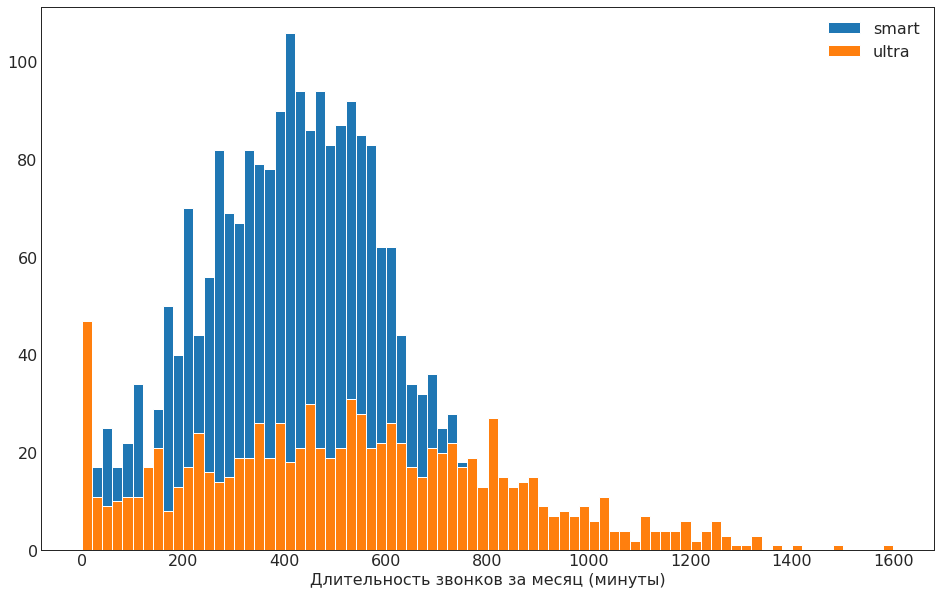

In [75]:
#Построю гистограммы длительности звонков в месяц на разных тарифах.

plt.hist(data_hist_call_smart, bins=80, range = (0, 1600), label='smart')
plt.hist(data_hist_call_ultra, bins=80, range = (0, 1600), label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Длительность звонков за месяц (минуты)')
plt.show()

In [76]:
print('Среднее тарифа ultra:', av_ultra_call)
print('Среднее тарифа smart:', av_smart_call)

print('Дисперсия тарифа ultra:',var_ultra_call)
print('Дисперсия тарифа smart:', var_smart_call)

print('Стандартное отклонение тарифа ultra:', std_ultra_call)
print('Стандартное отклонение тарифа smart:', std_smart_call)

Среднее тарифа ultra: 531
Среднее тарифа smart: 419
Дисперсия тарифа ultra: 98147
Дисперсия тарифа smart: 35326
Стандартное отклонение тарифа ultra: 313
Стандартное отклонение тарифа smart: 188


#### Вывод
Глядя на полученные данные и гистограммы, делаю вывод, что:
- пользователям тарифа smart требуется от 180 минут до 610, в среднем 419,
- многие пользователи тарифа ultra не используют звонки, а остальные укладываются в промежуток от 150 минут до 860, в среднем 531.

In [77]:
#Достаем количество сообщений за месяц из таблиц для каждого пользователя.
data_hist_mes_smart = []
for index, row in data_smart.iterrows():
    for i in range(row['tariff_life']):
        column_mes_sum_name = 'messages_count_' + str(i+1)
        data_hist_mes_smart.append(row[column_mes_sum_name])


data_hist_mes_ultra = []
for index, row in data_ultra.iterrows():
    for i in range(row['tariff_life']):
        column_mes_sum_name = 'messages_count_' + str(i+1)
        data_hist_mes_ultra.append(row[column_mes_sum_name])

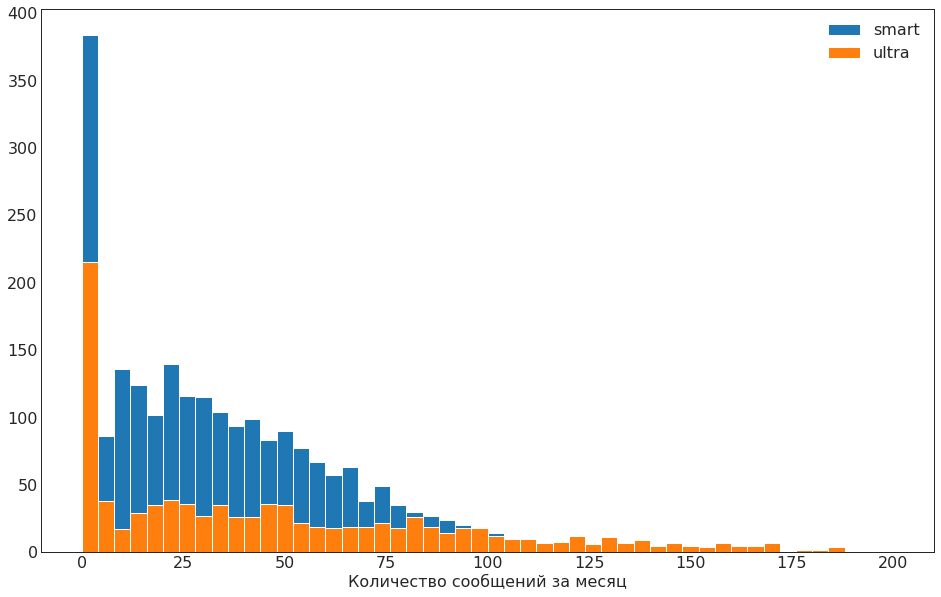

In [78]:
#Построю гистограммы количества сообщений в месяц на разных тарифах.

plt.hist(data_hist_mes_smart, bins=50, range = (0, 200), label='smart')
plt.hist(data_hist_mes_ultra, bins=50, range = (0, 200), label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Количество сообщений за месяц')
plt.show()

In [79]:
print('Среднее тарифа ultra:', av_ultra_mes)
print('Среднее тарифа smart:', av_smart_mes)

print('Дисперсия тарифа ultra:',var_ultra_mes)
print('Дисперсия тарифа smart:', var_smart_mes)

print('Стандартное отклонение тарифа ultra:', std_ultra_mes)
print('Стандартное отклонение тарифа smart:', std_smart_mes)

Среднее тарифа ultra: 50
Среднее тарифа smart: 33
Дисперсия тарифа ultra: 2276
Дисперсия тарифа smart: 787
Стандартное отклонение тарифа ultra: 48
Стандартное отклонение тарифа smart: 28


#### Вывод
Глядя на полученные данные и гистограммы, делаю вывод, что:
- большинство пользователей обоих тарифов не используют сообщения,
- остальным пользователям тарифа smart требуется от 5 сообщений до 60, в среднем 33,
- остальным пользователям тарифа ultra требуется от 5 сообщений до 80, в среднем 50, но график показывает, что значения очень сильно "разбросаны".

In [80]:
#Достаем количество интернет-трафика за месяц из таблиц для каждого пользователя.
data_hist_in_smart = []
for index, row in data_smart.iterrows():
    for i in range(row['tariff_life']):
        column_in_sum_name = 'internet_sum_' + str(i+1)
        data_hist_in_smart.append(row[column_in_sum_name])


data_hist_in_ultra = []
for index, row in data_ultra.iterrows():
    for i in range(row['tariff_life']):
        column_in_sum_name = 'internet_sum_' + str(i+1)
        data_hist_in_ultra.append(row[column_in_sum_name])

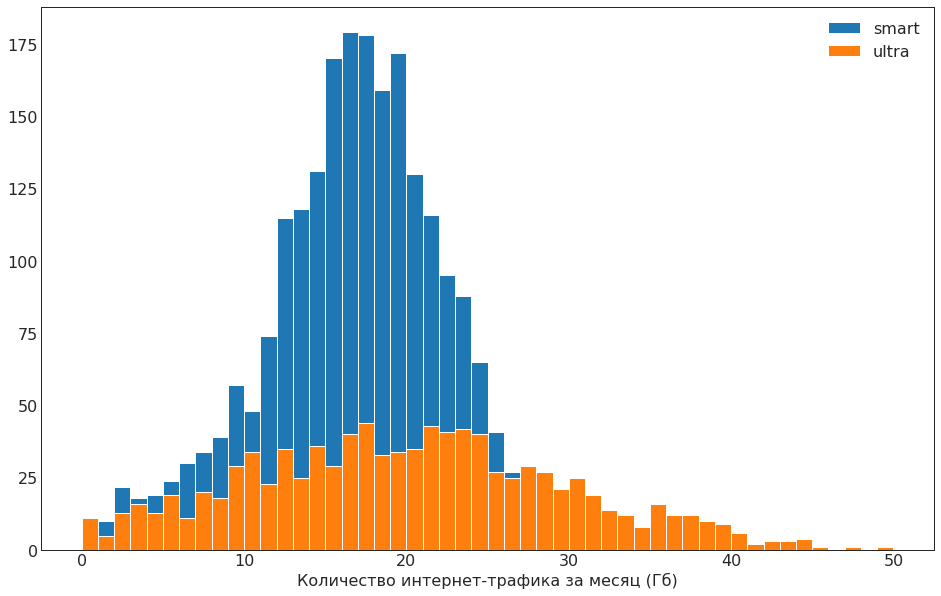

In [81]:
#Построю гистограммы количества интернет-трафика в месяц на разных тарифах.

plt.hist(data_hist_in_smart, bins=50, range = (0, 50), label='smart')
plt.hist(data_hist_in_ultra, bins=50, range = (0, 50), label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Количество интернет-трафика за месяц (Гб)')
plt.show()

In [82]:
print('Среднее тарифа ultra:', av_ultra_internet)
print('Среднее тарифа smart:', av_smart_internet)

print('Дисперсия тарифа ultra:',var_ultra_internet)
print('Дисперсия тарифа smart:', var_smart_internet)

print('Стандартное отклонение тарифа ultra:', std_ultra_in)
print('Стандартное отклонение тарифа smart:', std_smart_in)

Среднее тарифа ultra: 20
Среднее тарифа smart: 16
Дисперсия тарифа ultra: 95
Дисперсия тарифа smart: 32
Стандартное отклонение тарифа ultra: 10
Стандартное отклонение тарифа smart: 6


#### Вывод
Глядя на полученные данные и гистограммы, делаю вывод, что:
- пользователям тарифа smart требуется от 8 Гб до 25, в среднем 16,
- пользователям тарифа ultra требуется от 8 Гб до 32, в среднем 20.

## Общий вывод

Пользователям тарифа smart требуется в месяц:
- от 180 до 610 минут разговоров,в среднем 419,
- от 5 до 60 сообщений, в среднем 33,
- от 8 до 25 Гб интернета, в среднем 16.

Пользователям тарифа ultra требуется в месяц:
- от 150 до 860 минут разговоров, в среднем 530,
- от 5 до 80 сообщений, в среднем 50,
- от 8 до 32 Гб интернета, в среднем 20.

Общий вывод такой, что:
- многим пользователям обоих тарифов неинтересны смс-ки, 
- интернет в обоих пакетах - самая важная опция,
- звонки интереснее пользователмя тарифа smart, т.к. многие пользователи тарифа ultra не пользуются звонками.

## 5. Проверка гипотез

Проверим гипотезы и сделаем выводы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [83]:
from scipy import stats as st

<font color='purple'>Проверяем гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

Формулирую гипотезы для анализа:
- за нулевую принимаю гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна,
- за альтернативную принимаю гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Нулевая гипотеза - это гипотеза равенства, поэтому я так сформировала гипотезы выше.

Для анализа также примем alpha за 5%.

In [84]:
#Формируем выборки для анализа.
data_revenue_smart = []
for index, row in data_smart.iterrows():
    a = 0
    for i in range(row['tariff_life']):
        column_revenue_name = 'revenue_' + str(i+1)
        a += row[column_revenue_name]
    data_revenue_smart.append(a/row['tariff_life'])


data_revenue_ultra = []
for index, row in data_ultra.iterrows():
    b = 0
    for i in range(row['tariff_life']):
        column_revenue_name = 'revenue_' + str(i+1)
        b += row[column_revenue_name]
    data_revenue_ultra.append(b/row['tariff_life'])

Для выбора критерия ответим на вопрос: близко ли распределение к нормальному?

Для этого:
- строим гистограмму,
- применим метод scipy.stats.normaltest.

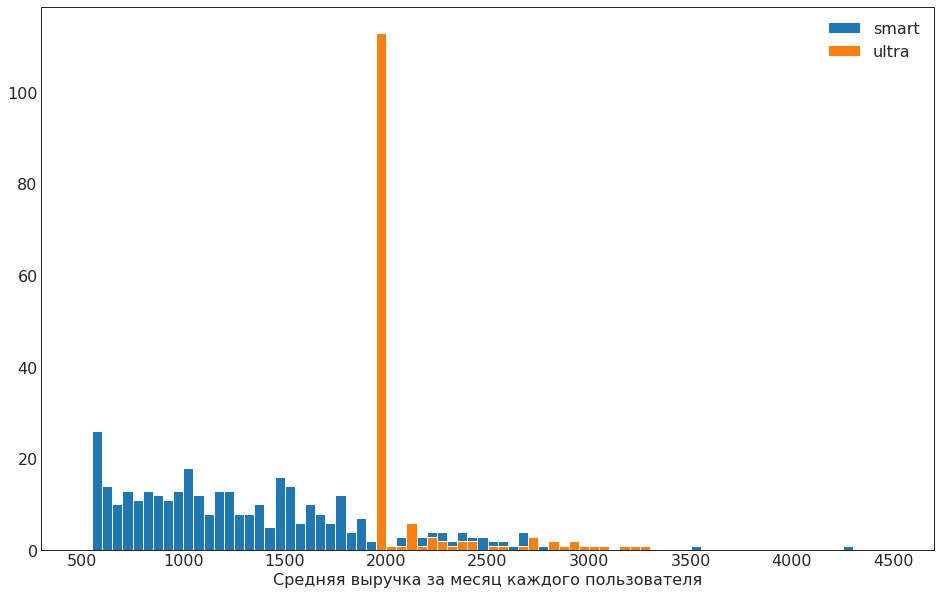

In [85]:
#Построю гистограммы средней выручки на разных тарифах.
plt.hist(data_revenue_smart, bins=80, range = (500, 4500), label='smart')
plt.hist(data_revenue_ultra, bins=80, range = (500, 4500), label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Средняя выручка за месяц каждого пользователя')
plt.show()

Формулирую гипотезы для анализа:
- за нулевую принимаю гипотезу: распределение близко к нормальному,
- за альтернативную принимаю гипотезу: распределение неблизко к нормальному <span style="color:red">лучше отличается от нормального</span>.

Проверим это к data_revenue_ultra и data_revenue_smart.

In [86]:
#Проверяем гипотезу для data_revenue_ultra.
from scipy import stats
p = stats.normaltest(data_revenue_ultra)
alpha = 0.05
print('p-значение:', p.pvalue)
if p.pvalue < alpha:  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3943984863997023e-18
Отвергаем нулевую гипотезу


In [87]:
#Проверяем гипотезу для data_revenue_smart.
from scipy import stats
p = stats.normaltest(data_revenue_smart)
alpha = 0.05
print('p-значение:', p.pvalue)
if p.pvalue < alpha:  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.9026618270440295e-14
Отвергаем нулевую гипотезу


##### Вывод
Данные противоречат нулевой гипотезе для обеих выборок при заданном уровне значимости alpha. Гипотеза отвергается.
Подтвреждение этому видим на гистограмме.

Поэтому применять метод scipy.stats.ttest_ind нельзя. Необходимо применить scipy.stats.mannwhitneyu.

<font color='purple'>Чтобы проверить нулевую гипотезу, применим метод scipy.stats.mannwhitneyu.

In [88]:
#Применю метод scipy.stats.mannwhitneyu для проверки гипотезы.
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(
    data_revenue_smart, 
    data_revenue_ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1955579872170497e-42
Отвергаем нулевую гипотезу


#### Вывод
Данные противоречат нулевой гипотезе при заданном уровне значимости alpha. Гипотеза отвергается.
Значит изначальная гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" скорее всего верна  для генеральной совокупности.

<font color='purple'>Проверяем гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Формулирую гипотезы для анализа:
- за нулевую принимаю гипотезу: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов,
- за альтернативную принимаю гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза - это гипотеза равенства, поэтому я так сформировала гипотезы выше.

Для анализа также примем alpha за 5%.

In [89]:
#Формирую таблицы: с пользователями из Москвы и остальными.
data['city'] = data_users['city']
data_moscow = data.query('city == "Москва"')
data_other = data.query('city != "Москва"')

#формируем вборки для анализа.
data_revenue_moscow = []
for index, row in data_moscow.iterrows():
    a = 0
    for i in range(row['tariff_life']):
        column_revenue_name = 'revenue_' + str(i+1)
        a += row[column_revenue_name]
    data_revenue_moscow.append(a/row['tariff_life'])


data_revenue_other = []
for index, row in data_other.iterrows():
    b = 0
    for i in range(row['tariff_life']):
        column_revenue_name = 'revenue_' + str(i+1)
        b += row[column_revenue_name]
    data_revenue_other.append(b/row['tariff_life'])

Для выбора критерия ответим на вопрос: близко ли распределение к нормальному?

Для этого:
- строим гистограмму,
- применим метод scipy.stats.normaltest.

In [90]:
data_revenue_moscow

[950.0,
 1950.0,
 916.5555555555555,
 890.5,
 1944.8333333333333,
 1016.6666666666666,
 1874.5,
 1950.0,
 1030.0,
 1950.0,
 1135.0,
 2331.9,
 645.6666666666666,
 2218.5,
 1522.0,
 701.875,
 1950.0,
 1950.0,
 718.6666666666666,
 1520.4285714285713,
 1450.0,
 735.5,
 1043.25,
 550.0,
 1768.5454545454545,
 1083.3333333333333,
 550.0,
 1071.0,
 1327.7777777777778,
 643.0,
 2413.6363636363635,
 550.0,
 562.0,
 550.0,
 1950.0,
 1950.0,
 1694.0833333333333,
 1483.3333333333333,
 550.0,
 2543.3333333333335,
 908.3333333333334,
 2121.0,
 1514.0,
 1617.0,
 1950.0,
 1590.125,
 1931.125,
 1950.0,
 1186.3333333333333,
 1053.75,
 729.1111111111111,
 2400.0,
 1450.0,
 2418.5,
 1950.0,
 849.3636363636364,
 664.2857142857143,
 2800.0,
 1794.3333333333333,
 883.3333333333334,
 1157.5,
 1000.8181818181819,
 2133.3333333333335,
 1288.75,
 1950.0,
 1950.0,
 1075.0,
 1532.0,
 2207.1428571428573,
 1035.7142857142858,
 1950.0,
 1950.0,
 2500.0,
 1068.1666666666667,
 1950.0,
 2130.0,
 1975.0,
 2362.5,
 883.333

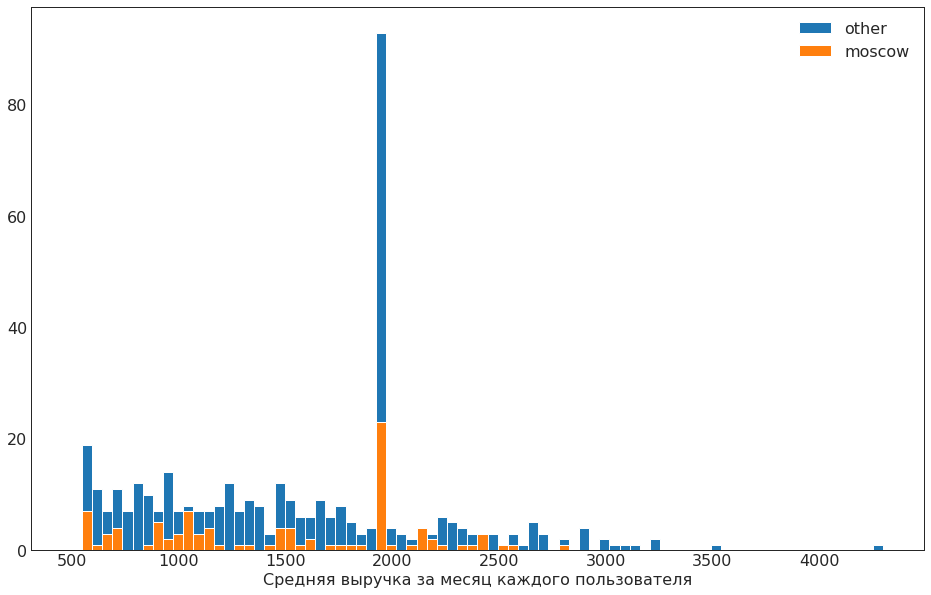

In [91]:
#Построю гистограммы средней выручки на разных тарифах.
plt.hist(data_revenue_other, bins=80, range = (500, 4300), label='other')
plt.hist(data_revenue_moscow, bins=80, range = (500, 4300), label='moscow')
plt.legend(loc='upper right')
plt.xlabel('Средняя выручка за месяц каждого пользователя')
plt.show()

Формулирую гипотезы для анализа:
- за нулевую принимаю гипотезу: распределение близко к нормальному,
- за альтернативную принимаю гипотезу: распределение неблизко к нормальному.

Проверим это к data_revenue_moscow и data_revenue_other.

In [92]:
#Проверяем гипотезу для data_revenue_moscow.
from scipy import stats
p = stats.normaltest(data_revenue_moscow)
alpha = 0.05
print('p-значение:', p.pvalue)
if p.pvalue < alpha:  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8300067790880706e-07
Отвергаем нулевую гипотезу


In [93]:
#Проверяем гипотезу для data_revenue_other.
from scipy import stats
p = stats.normaltest(data_revenue_other)
alpha = 0.05
print('p-значение:', p.pvalue)
if p.pvalue < alpha:  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0049827383027252516
Отвергаем нулевую гипотезу


##### Вывод
Данные противоречат нулевой гипотезе для обеих выборок при заданном уровне значимости alpha. Гипотеза отвергается.
Подтверждение этому видим на гистограмме.

Поэтому применять метод scipy.stats.ttest_ind нельзя. Необходимо применить scipy.stats.mannwhitneyu.

<font color='purple'>Чтобы проверить нулевую гипотезу, применим метод scipy.stats.mannwhitneyu.

In [94]:
#Применю метод scipy.stats.mannwhitneyu для проверки гипотезы.
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(
    data_revenue_moscow, 
    data_revenue_other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.28611725306558167
Не получилось отвергнуть нулевую гипотезу


#### Вывод
Данные не противоречат нулевой гипотезе, не получилось ее отвергнуть.
Значит изначальная гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" скорее всего неверна для генеральной совокупности.

### Общий вывод
После проверок гипотез можно сделать вывод:
- гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" скорее всего верна для генеральной совокупности,
- гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" скорее всего неверна для генеральной совокупности.

## 6. Подведение итогов исследования: выводы

Для ответа на главный вопрос исследования: **"какой тариф лучше?"** необходимо посчитать среднюю выручку по каждому тарифу.

In [95]:
mean_smart = sum(data_revenue_smart)/len(data_revenue_smart)
print('Средняя ежемесячная выручка с пользователя тарифа smart:', mean_smart)

mean_ultra = sum(data_revenue_ultra)/len(data_revenue_ultra)
print('Средняя ежемесячная выручка с пользователя тарифа ultra:', mean_ultra)

Средняя ежемесячная выручка с пользователя тарифа smart: 1310.8611803834021
Средняя ежемесячная выручка с пользователя тарифа ultra: 2089.205526017607


**Для компании "Мегалайн" лучше тариф ultra, т.к. он приносит больше выручки с каждого пользователя.**

Также в ходе исследования были полученнны следующие данные по использованию тарифов:

*Пользователям тарифа smart требуется в месяц:*
- от 180 до 610 минут разговоров,в среднем 419,
- от 5 до 60 сообщений, в среднем 33,
- от 8 до 25 Гб интернета, в среднем 16.

*Пользователям тарифа ultra требуется в месяц:*
- от 150 до 860 минут разговоров, в среднем 530,
- от 5 до 80 сообщений, в среднем 50,
- от 8 до 32 Гб интернета, в среднем 20.

*Общий вывод такой, что:*
- многим пользователям обоих тарифов неинтерсны смс-ки, 
- интернет в обоих пакетах - самая важная опция,
- звонки интереснее пользователмя тарифа smart, т.к. многие пользователи тарифа ultra не пользуются звонками.

**Эти данные можно использовать для корректировки самих тарифов.**

Также были проверены две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


После проверок гипотез можно сделать вывод:
- гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" скорее всего верна для генеральной совокупности,
- гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" скорее всего неверна для генеральной совокупности.